In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from zipfile import ZipFile
plt.rcParams.update({'figure.max_open_warning': 30})
from processing import *
from helpers import *

%load_ext autoreload
%autoreload 2

In [2]:
#Load the dataset and look at the shapes and information about the data 
path_dataset_train = './data/train.csv.zip'
path_dataset_test = './data/test.csv.zip'
y, x, ids_train = load_data(path_dataset_train)
with ZipFile(path_dataset_test) as zf: 
    features_name = np.genfromtxt(zf.open(path_dataset_test[7:-4]), delimiter=",", dtype=str, max_rows=1)[2:]
print('y shape:', y.shape)
print('x shape:', x.shape)
for i, name in enumerate(features_name):
    print(i, ':', features_name[i]) 

y shape: (250000,)
x shape: (250000, 30)
0 : DER_mass_MMC
1 : DER_mass_transverse_met_lep
2 : DER_mass_vis
3 : DER_pt_h
4 : DER_deltaeta_jet_jet
5 : DER_mass_jet_jet
6 : DER_prodeta_jet_jet
7 : DER_deltar_tau_lep
8 : DER_pt_tot
9 : DER_sum_pt
10 : DER_pt_ratio_lep_tau
11 : DER_met_phi_centrality
12 : DER_lep_eta_centrality
13 : PRI_tau_pt
14 : PRI_tau_eta
15 : PRI_tau_phi
16 : PRI_lep_pt
17 : PRI_lep_eta
18 : PRI_lep_phi
19 : PRI_met
20 : PRI_met_phi
21 : PRI_met_sumet
22 : PRI_jet_num
23 : PRI_jet_leading_pt
24 : PRI_jet_leading_eta
25 : PRI_jet_leading_phi
26 : PRI_jet_subleading_pt
27 : PRI_jet_subleading_eta
28 : PRI_jet_subleading_phi
29 : PRI_jet_all_pt


[Text(0.5, 1.0, 'Prediction'), Text(0.5, 0, 'label')]

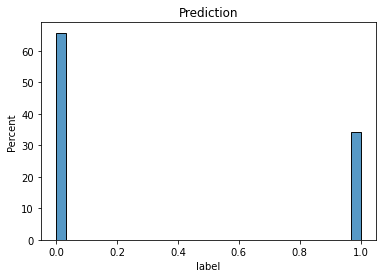

In [3]:
# Look a the distribution of the labels
sns.histplot(y, stat='percent').set(title='Prediction', xlabel='label')

In [9]:
percent_of_zeros = np.count_nonzero(y == 0) / len(y)
percent_of_one = np.count_nonzero(y == 1) / len(y)

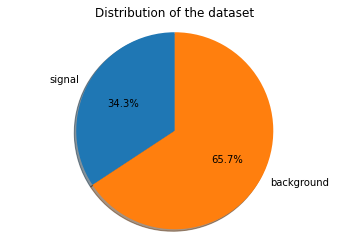

In [10]:
# Pie chart
labels = 'signal','background'
sizes = [percent_of_one, percent_of_zeros]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of the dataset")
plt.show()

We see that the dataset is slighty unbalanced with around 35% of signal (a Higgs boson) and 65% of background (something else).

## Distribution of the features:

##### Some basics stats about the features:

In [7]:
for i, name in enumerate(features_name):
    print("Feature", i, ":" , name)
    print("Mean =", x[:,i].mean())
    print("Median =", np.median(x[:,i]))
    print("5th percentile =", np.percentile(x[:,i], 5))
    print("95th percentile =", np.percentile(x[:,i], 95))
    print("Min = ", np.min(x[:,i]))
    print("Max = ", np.max(x[:,i]), '\n')
    print("**********************************", '\n')

Feature 0 : DER_mass_MMC
Mean = -49.023079440000004
Median = 105.012
5th percentile = -999.0
95th percentile = 201.808
Min =  -999.0
Max =  1192.026 

********************************** 

Feature 1 : DER_mass_transverse_met_lep
Mean = 49.239819276
Median = 46.524
5th percentile = 3.3889500000000004
95th percentile = 104.64419999999996
Min =  0.0
Max =  690.075 

********************************** 

Feature 2 : DER_mass_vis
Mean = 81.181981612
Median = 73.752
5th percentile = 37.87395
95th percentile = 149.27005
Min =  6.329
Max =  1349.351 

********************************** 

Feature 3 : DER_pt_h
Mean = 57.895961656
Median = 38.4675
5th percentile = 1.201
95th percentile = 183.4911
Min =  0.0
Max =  2834.999 

********************************** 

Feature 4 : DER_deltaeta_jet_jet
Mean = -708.4206753999999
Median = -999.0
5th percentile = -999.0
95th percentile = 4.276
Min =  -999.0
Max =  8.503 

********************************** 

Feature 5 : DER_mass_jet_jet
Mean = -601.23705073199

##### The distribution

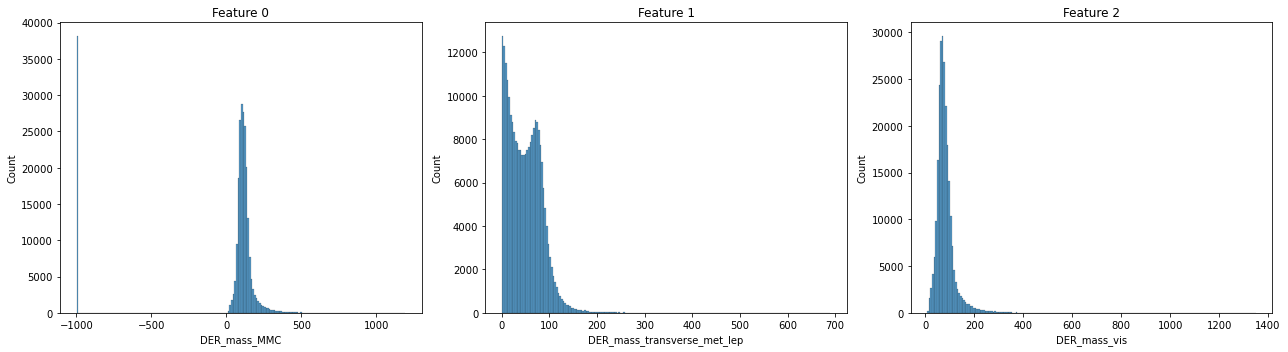

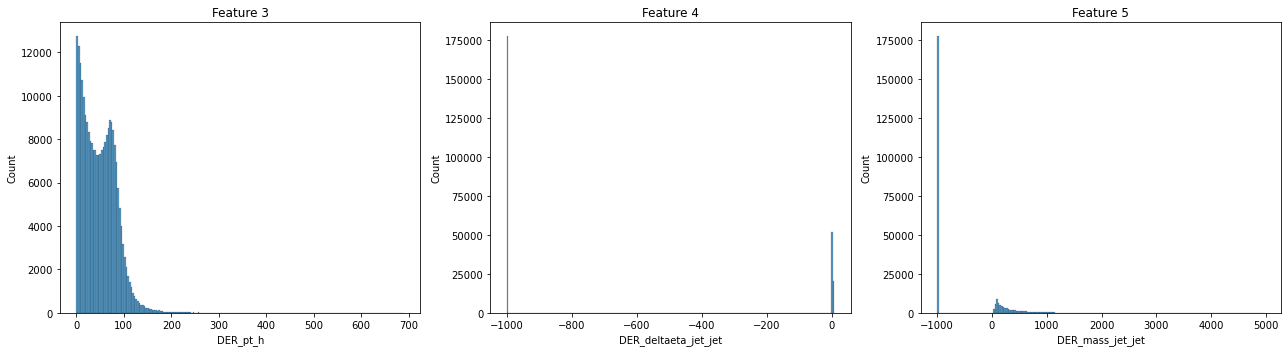

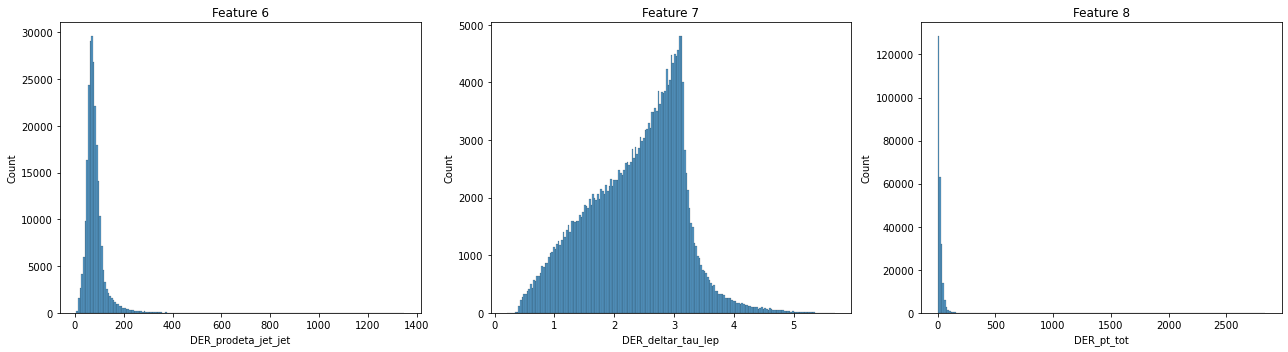

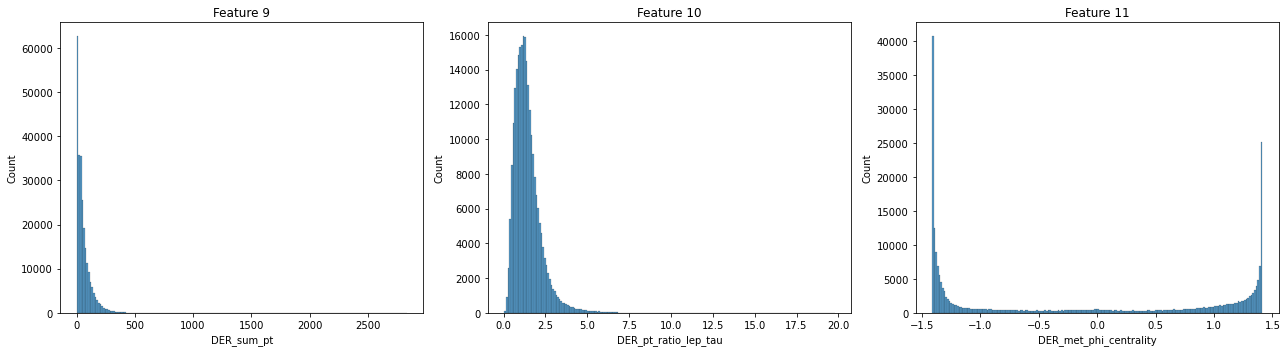

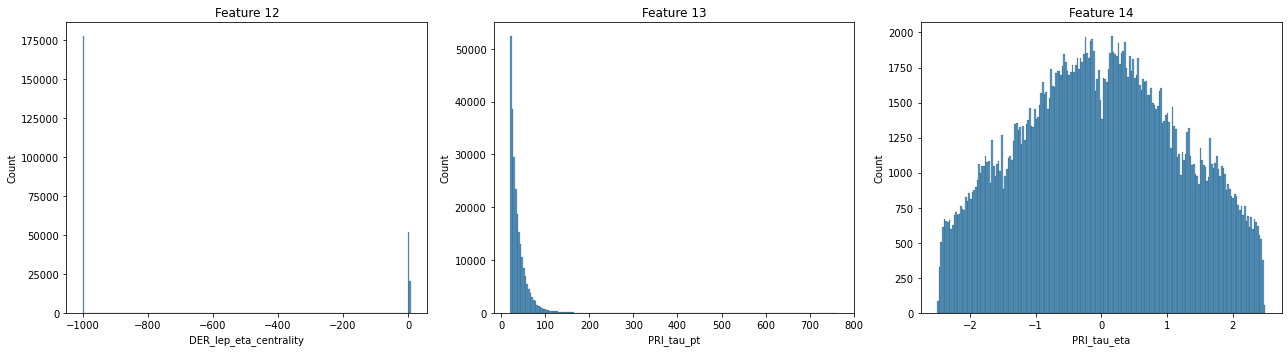

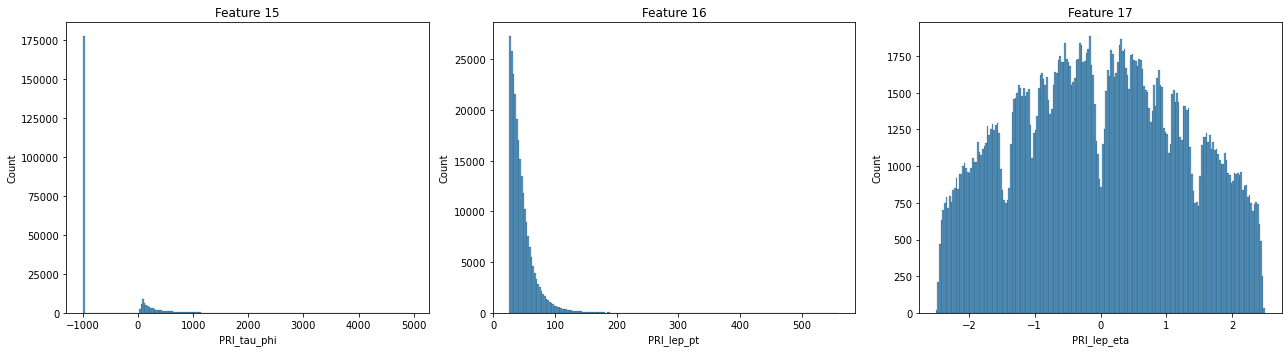

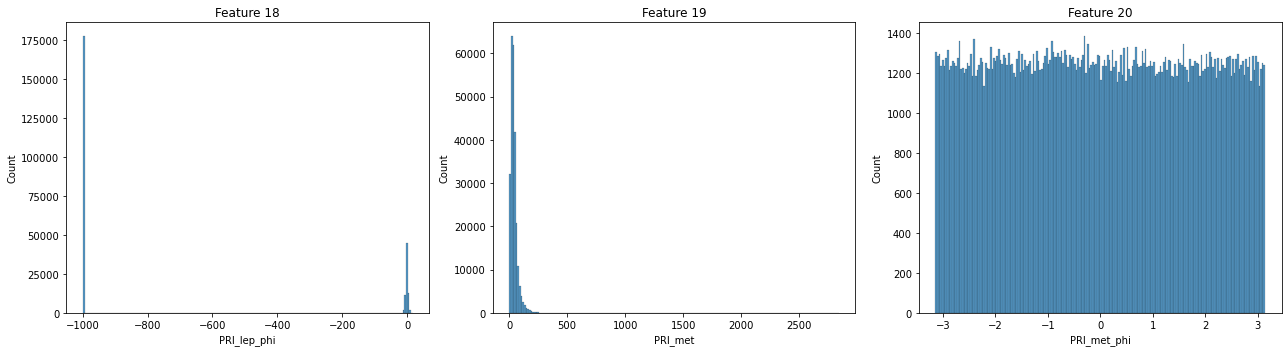

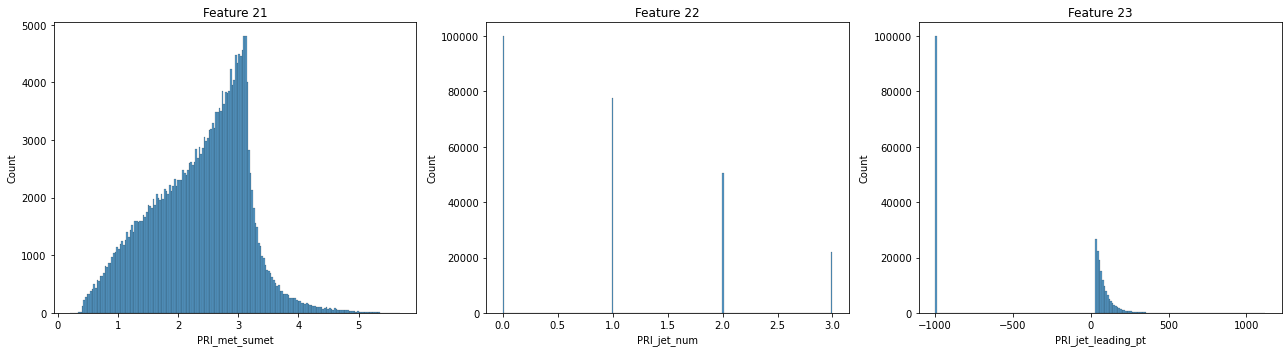

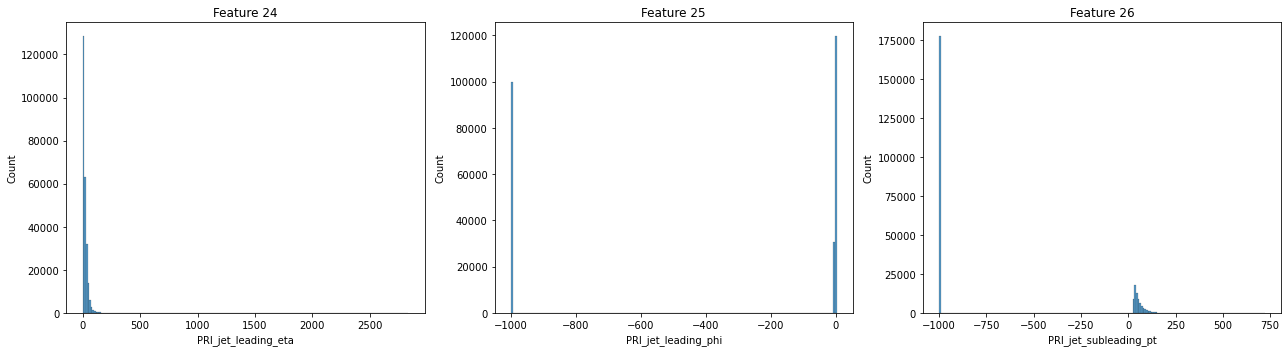

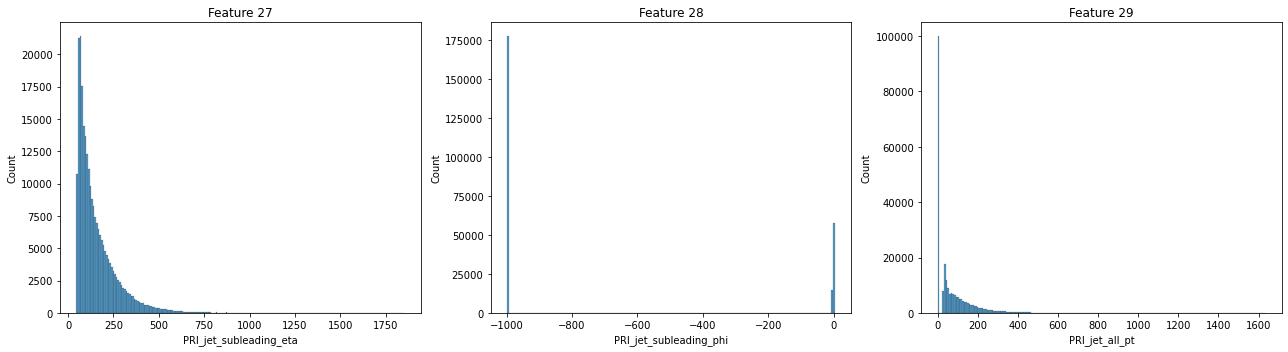

In [8]:
for i in range(len(features_name) // 3):

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    sns.histplot(x[:,i], bins=200, ax=ax1).set(title='Feature '+ str(3*i), xlabel=features_name[3*i])
    sns.histplot(x[:,3*i+1], bins=200, ax=ax2).set(title='Feature '+ str(3*i+1), xlabel=features_name[3*i+1])
    sns.histplot(x[:,3*i+2], bins=200, ax=ax3).set(title='Feature '+ str(3*i+2), xlabel=features_name[3*i+2])

    fig.tight_layout()
    plt.show

We notice that some features have values equal to -999 and we need to dig deeper for those values. It is the case for features 0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28.

In [9]:
features_with_999 = [0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28]

#### Distribution without the -999

Here we show the same distribution but without the -999

Moreover, we split the dataset over the labels to see which features explain the best the dataset and apply a `np.log(1+x)` and `np.log(np.log(1+x))` to see if applying this function explains more the data.

Finally, for each feature, we save the best applied function - the one separating the most the labels - in `log_f` if the $log(\cdot)$ is the best one and in `log_log_f` if applying $log(log(\cdot))$ is better.

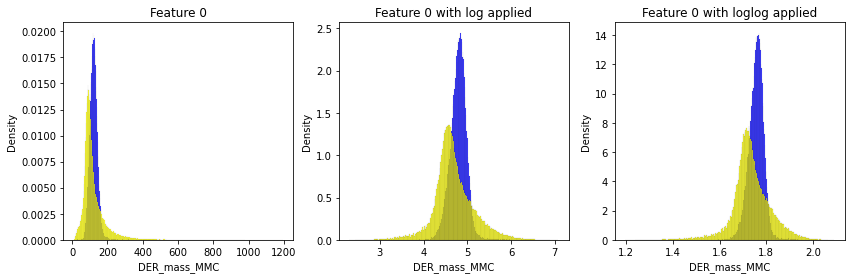

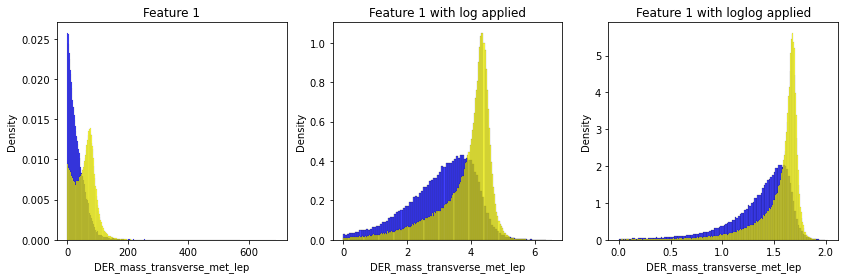

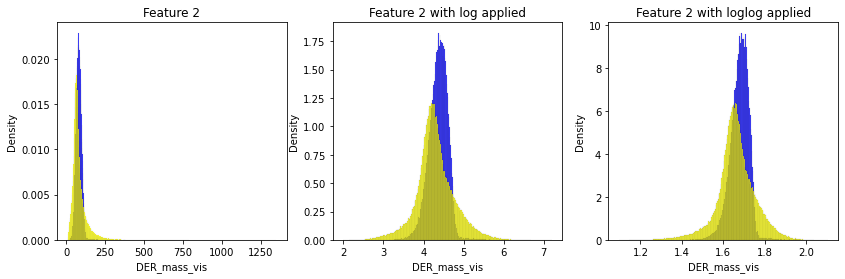

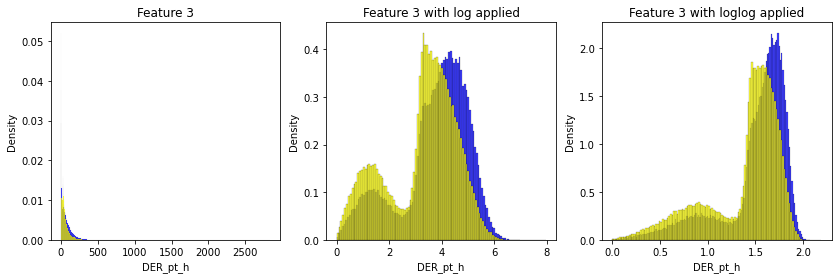

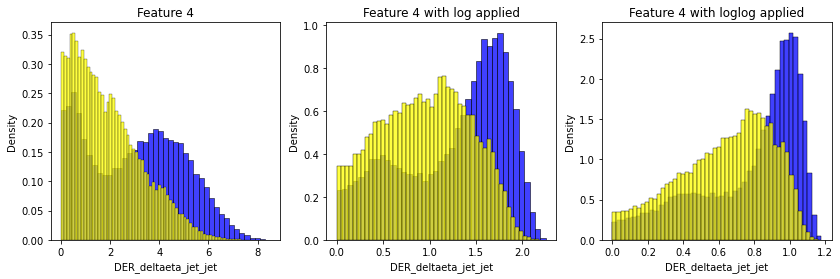

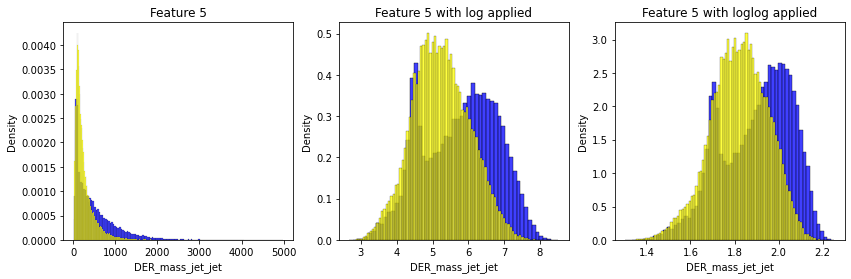

C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:11: RuntimeWarning: divide by zero encountered in log
  s_distribution = data_transformations(x[filter_s], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:11: RuntimeWarning: invalid value encountered in log
  s_distribution = data_transformations(x[filter_s], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:12: RuntimeWarning: divide by zero encountered in log
  b_distribution = data_transformations(x[filter_b], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:12: RuntimeWarning: invalid value encountered in log
  b_distribution = data_transformations(x[filter_b], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:16: RuntimeWarning: divide by zero encountered in log
  s_distribution = data_transformations(x[filter_s

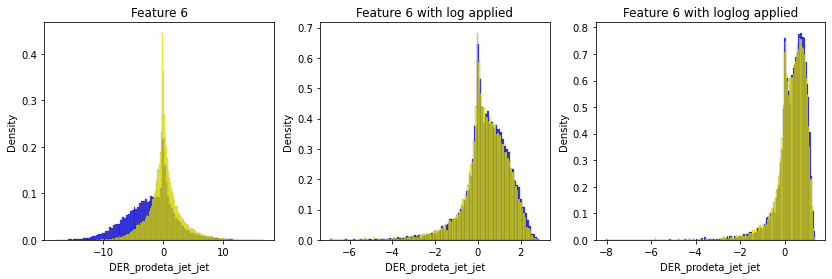

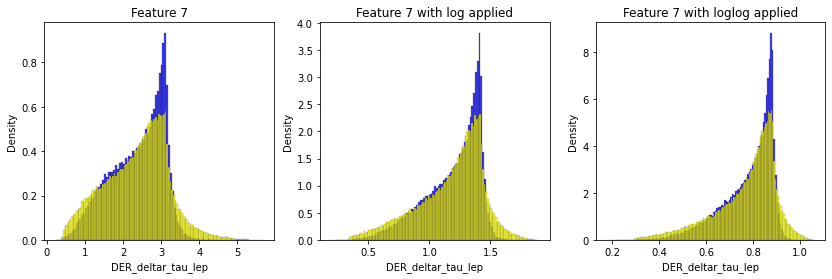

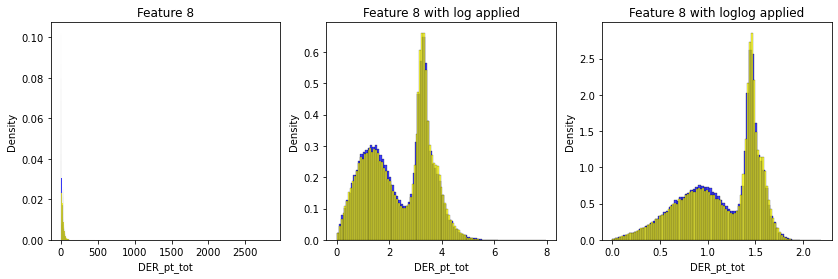

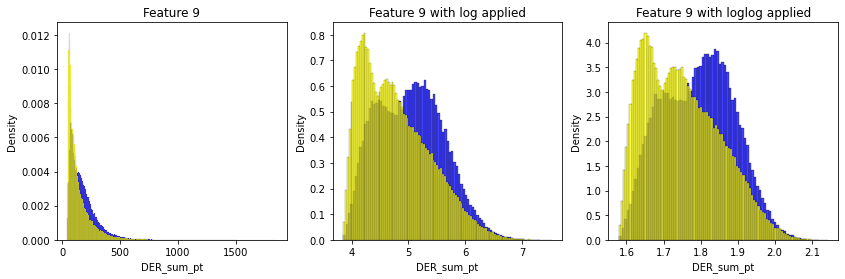

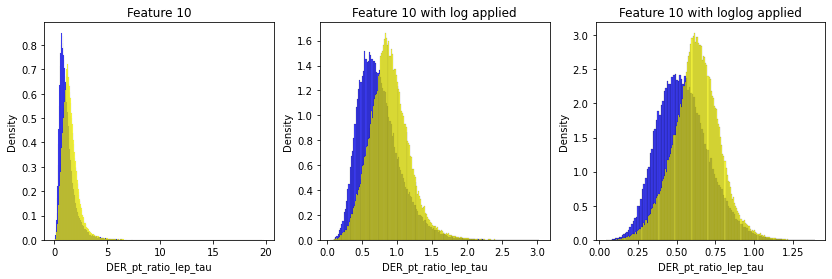

C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:11: RuntimeWarning: divide by zero encountered in log
  s_distribution = data_transformations(x[filter_s], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:11: RuntimeWarning: invalid value encountered in log
  s_distribution = data_transformations(x[filter_s], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:12: RuntimeWarning: divide by zero encountered in log
  b_distribution = data_transformations(x[filter_b], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:12: RuntimeWarning: invalid value encountered in log
  b_distribution = data_transformations(x[filter_b], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:16: RuntimeWarning: divide by zero encountered in log
  s_distribution = data_transformations(x[filter_s

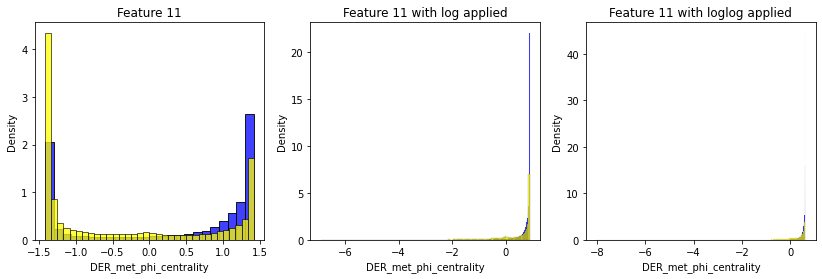

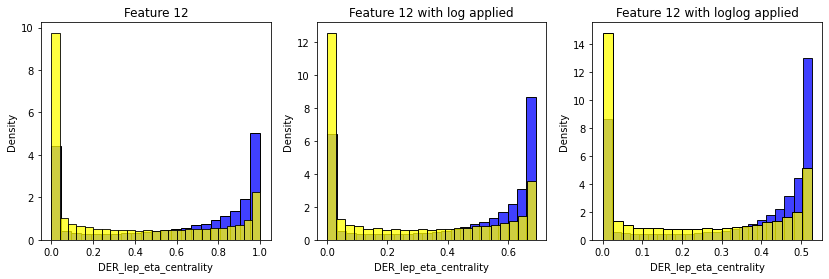

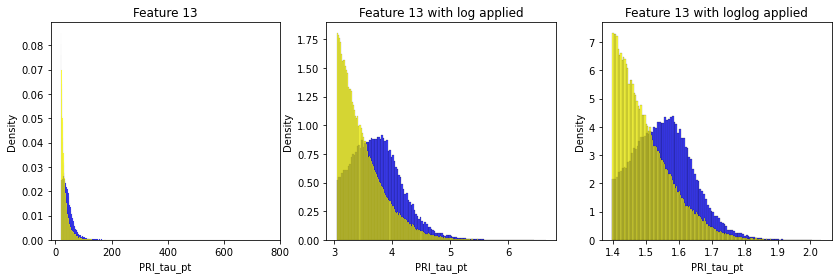

C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:11: RuntimeWarning: divide by zero encountered in log
  s_distribution = data_transformations(x[filter_s], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:11: RuntimeWarning: invalid value encountered in log
  s_distribution = data_transformations(x[filter_s], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:12: RuntimeWarning: divide by zero encountered in log
  b_distribution = data_transformations(x[filter_b], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:12: RuntimeWarning: invalid value encountered in log
  b_distribution = data_transformations(x[filter_b], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:16: RuntimeWarning: divide by zero encountered in log
  s_distribution = data_transformations(x[filter_s

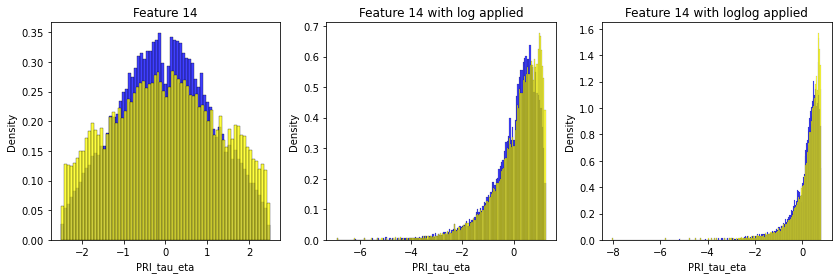

C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:11: RuntimeWarning: divide by zero encountered in log
  s_distribution = data_transformations(x[filter_s], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:11: RuntimeWarning: invalid value encountered in log
  s_distribution = data_transformations(x[filter_s], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:12: RuntimeWarning: divide by zero encountered in log
  b_distribution = data_transformations(x[filter_b], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:12: RuntimeWarning: invalid value encountered in log
  b_distribution = data_transformations(x[filter_b], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:16: RuntimeWarning: divide by zero encountered in log
  s_distribution = data_transformations(x[filter_s

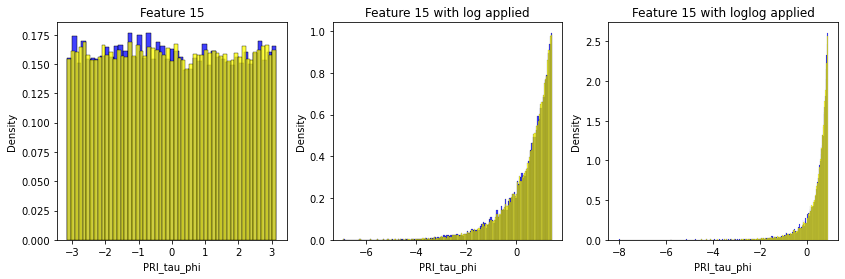

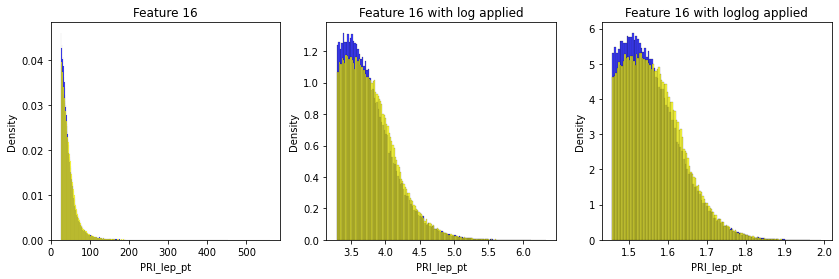

C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:11: RuntimeWarning: divide by zero encountered in log
  s_distribution = data_transformations(x[filter_s], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:11: RuntimeWarning: invalid value encountered in log
  s_distribution = data_transformations(x[filter_s], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:12: RuntimeWarning: divide by zero encountered in log
  b_distribution = data_transformations(x[filter_b], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:12: RuntimeWarning: invalid value encountered in log
  b_distribution = data_transformations(x[filter_b], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:16: RuntimeWarning: divide by zero encountered in log
  s_distribution = data_transformations(x[filter_s

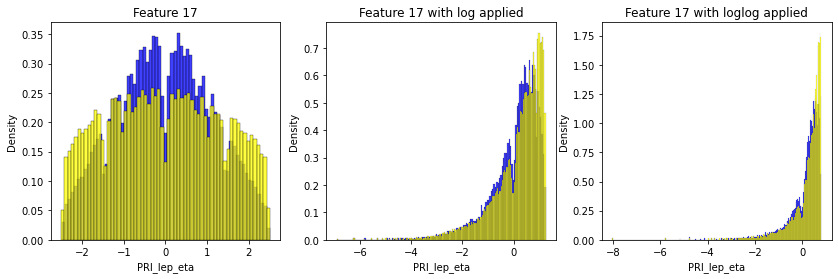

C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:11: RuntimeWarning: divide by zero encountered in log
  s_distribution = data_transformations(x[filter_s], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:11: RuntimeWarning: invalid value encountered in log
  s_distribution = data_transformations(x[filter_s], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:12: RuntimeWarning: divide by zero encountered in log
  b_distribution = data_transformations(x[filter_b], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:12: RuntimeWarning: invalid value encountered in log
  b_distribution = data_transformations(x[filter_b], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:16: RuntimeWarning: divide by zero encountered in log
  s_distribution = data_transformations(x[filter_s

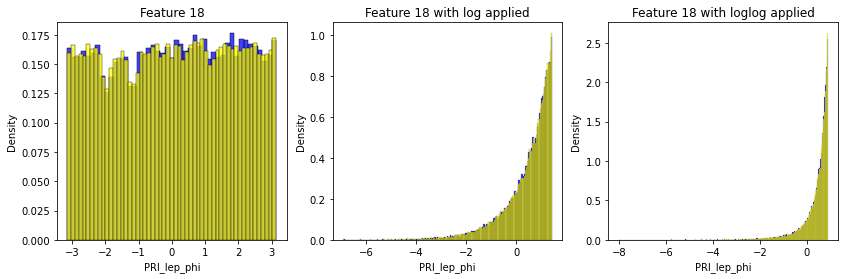

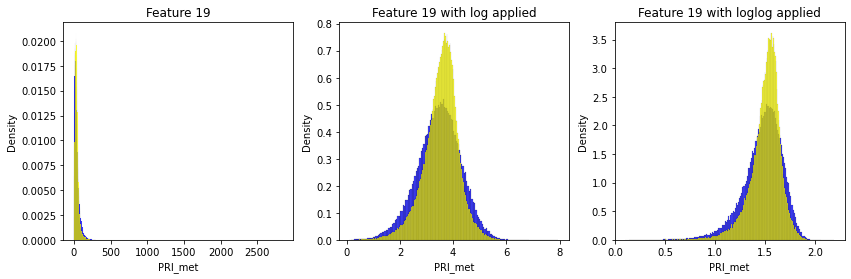

C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:11: RuntimeWarning: divide by zero encountered in log
  s_distribution = data_transformations(x[filter_s], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:11: RuntimeWarning: invalid value encountered in log
  s_distribution = data_transformations(x[filter_s], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:12: RuntimeWarning: divide by zero encountered in log
  b_distribution = data_transformations(x[filter_b], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:12: RuntimeWarning: invalid value encountered in log
  b_distribution = data_transformations(x[filter_b], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:16: RuntimeWarning: divide by zero encountered in log
  s_distribution = data_transformations(x[filter_s

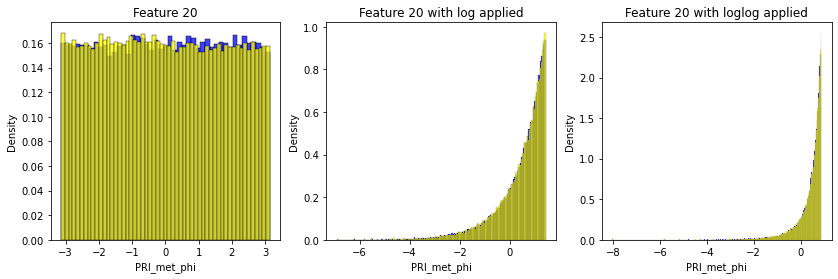

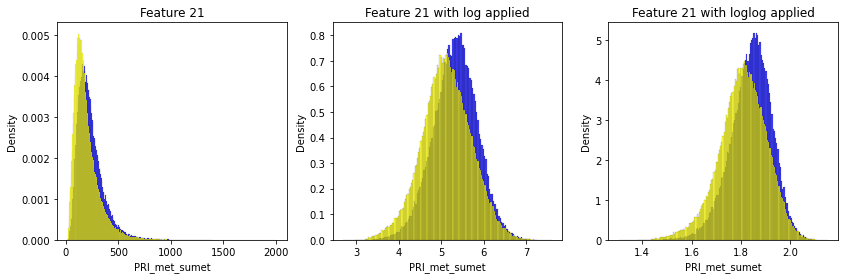

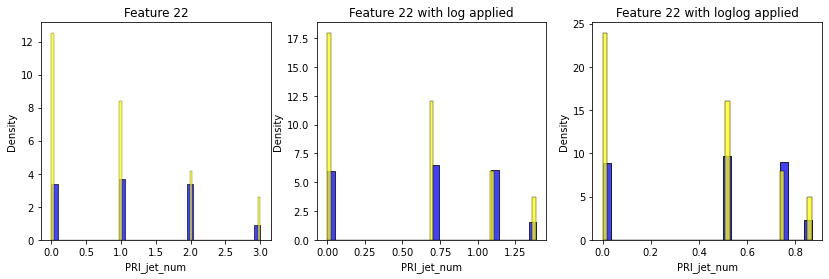

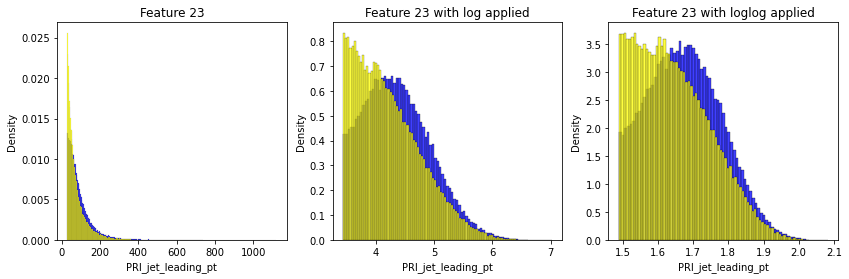

C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:11: RuntimeWarning: divide by zero encountered in log
  s_distribution = data_transformations(x[filter_s], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:11: RuntimeWarning: invalid value encountered in log
  s_distribution = data_transformations(x[filter_s], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:12: RuntimeWarning: divide by zero encountered in log
  b_distribution = data_transformations(x[filter_b], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:12: RuntimeWarning: invalid value encountered in log
  b_distribution = data_transformations(x[filter_b], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:16: RuntimeWarning: divide by zero encountered in log
  s_distribution = data_transformations(x[filter_s

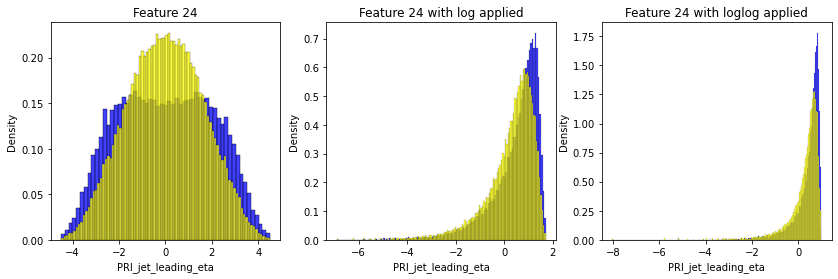

C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:11: RuntimeWarning: divide by zero encountered in log
  s_distribution = data_transformations(x[filter_s], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:11: RuntimeWarning: invalid value encountered in log
  s_distribution = data_transformations(x[filter_s], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:12: RuntimeWarning: divide by zero encountered in log
  b_distribution = data_transformations(x[filter_b], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:12: RuntimeWarning: invalid value encountered in log
  b_distribution = data_transformations(x[filter_b], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:16: RuntimeWarning: divide by zero encountered in log
  s_distribution = data_transformations(x[filter_s

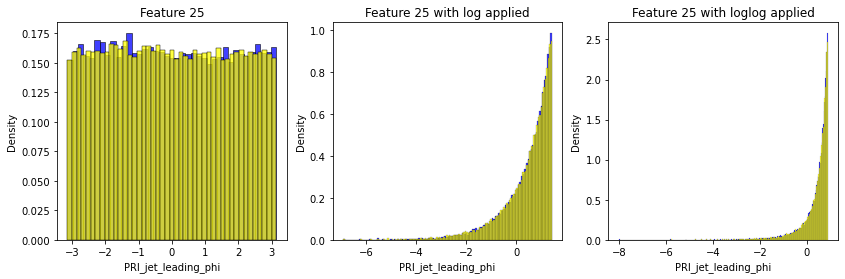

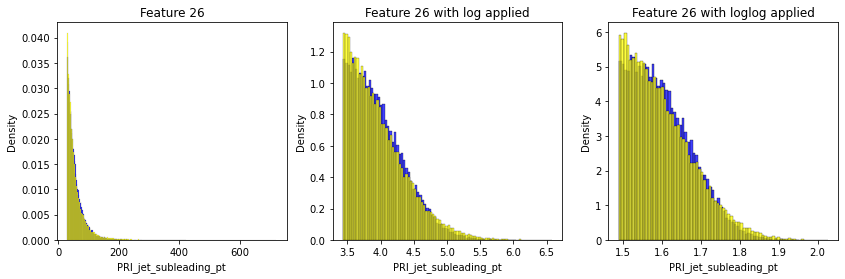

C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:11: RuntimeWarning: divide by zero encountered in log
  s_distribution = data_transformations(x[filter_s], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:11: RuntimeWarning: invalid value encountered in log
  s_distribution = data_transformations(x[filter_s], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:12: RuntimeWarning: divide by zero encountered in log
  b_distribution = data_transformations(x[filter_b], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:12: RuntimeWarning: invalid value encountered in log
  b_distribution = data_transformations(x[filter_b], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:16: RuntimeWarning: divide by zero encountered in log
  s_distribution = data_transformations(x[filter_s

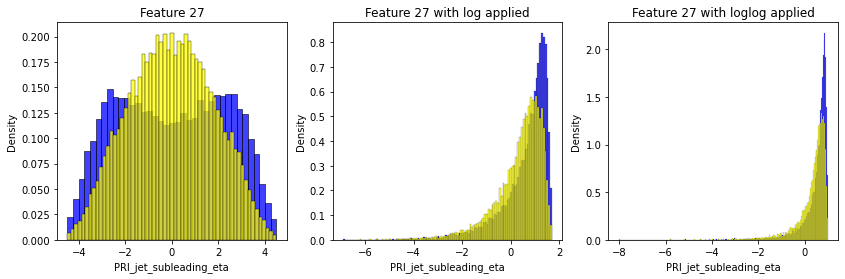

C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:11: RuntimeWarning: divide by zero encountered in log
  s_distribution = data_transformations(x[filter_s], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:11: RuntimeWarning: invalid value encountered in log
  s_distribution = data_transformations(x[filter_s], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:12: RuntimeWarning: divide by zero encountered in log
  b_distribution = data_transformations(x[filter_b], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:12: RuntimeWarning: invalid value encountered in log
  b_distribution = data_transformations(x[filter_b], i, lambda a: np.log(a + 1), True)[:, i]
C:\Users\mathi\AppData\Local\Temp/ipykernel_45440/13746305.py:16: RuntimeWarning: divide by zero encountered in log
  s_distribution = data_transformations(x[filter_s

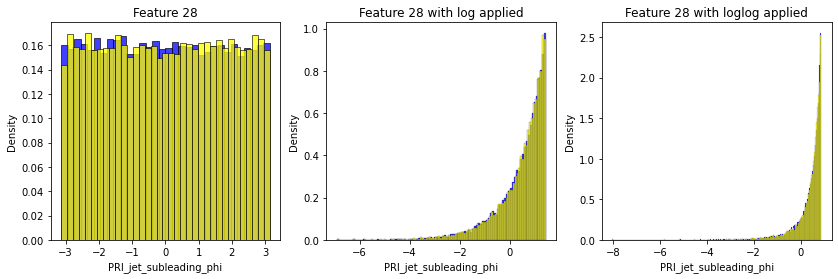

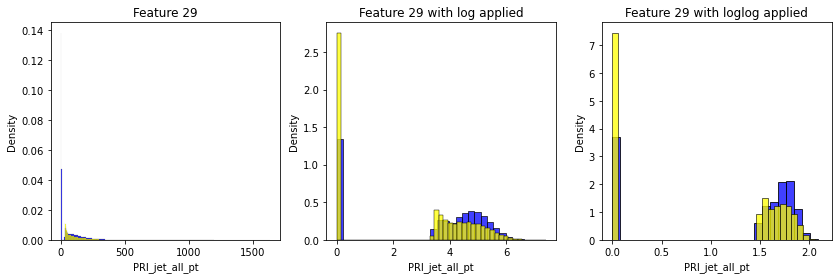

In [10]:
for i, name in enumerate(features_name):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
    filter_s = np.logical_and(y == 1, x[:, i] != -999)
    filter_b = np.logical_and(y == 0, x[:, i] != -999)
    
    s_distribution = x[:,i][filter_s]
    b_distribution = x[:,i][filter_b]
    sns.histplot(s_distribution, stat='density', color="blue", ax = ax1)
    sns.histplot(b_distribution, stat='density', color="yellow", ax = ax1).set(title='Feature '+ str(i), xlabel=name)
    #with log
    s_distribution = data_transformations(x[filter_s], i, lambda a: np.log(a + 1), True)[:, i]
    b_distribution = data_transformations(x[filter_b], i, lambda a: np.log(a + 1), True)[:, i]
    sns.histplot(s_distribution, stat='density', color="blue", ax = ax2)
    sns.histplot(b_distribution, stat='density', color="yellow", ax = ax2).set(title='Feature '+ str(i) + ' with log applied', xlabel=name)
    #with loglog
    s_distribution = data_transformations(x[filter_s], i, lambda a: np.log(np.log(a + 1) + 1), True)[:, i]
    b_distribution = data_transformations(x[filter_b], i, lambda a: np.log(np.log(a + 1) + 1), True)[:, i]
    sns.histplot(s_distribution, stat='density', color="blue", ax = ax3)
    sns.histplot(b_distribution, stat='density', color="yellow", ax = ax3).set(title='Feature '+ str(i) + ' with loglog applied', xlabel=name)
    plt.show()

In [11]:
log_f = [0, 1, 2, 3, 4, 5, 7, 8, 10, 19, 21, 29]
log_log_f = [9,13,16,23,26]

## Any insight in the -999 ?

We would like to know is there is any information when a feature $f_i$ is equal to -999 or if we can simply choose another value for those sample. In order to find this we will compute $P(y = s\mid f_i=-999)$ and $P(y = b\mid f_i=-999)$

In [22]:
nb_sample = y.size
nb_s = y[y == 1].size
nb_b = y[y == 0].size
prob_s = nb_sample / nb_s
prob_b = nb_sample / nb_b

for i in features_with_999:
    sample_with_999 = y[x[:, i] == -999]
    prob_999 = sample_with_999.size / nb_sample
    nb_999_and_s = sample_with_999[sample_with_999 == 1].size
    nb_999_and_b = sample_with_999[sample_with_999 == 0].size
    prob_999_and_s = nb_999_and_s / nb_sample
    prob_999_and_b = nb_999_and_b / nb_sample

    prob_s_given_999 = prob_999_and_s / prob_999
    prob_b_given_999 = prob_999_and_b / prob_999
    print("Feature ",str(i)," with ",str(sample_with_999.size)," rows : Given that a sample has -999 "+
          ", \n   the probability that it is a signal is :    ", prob_s_given_999 * 100, 
          "and \n   the probability that it is not a signal is: ", prob_b_given_999 * 100, "\n")

Feature  0  with  38114  rows : Given that a sample has -999 , 
   the probability that it is a signal is :     7.438211680747231 and 
   the probability that it is not a signal is:  92.56178831925276 

Feature  4  with  177457  rows : Given that a sample has -999 , 
   the probability that it is a signal is :     29.980220560473803 and 
   the probability that it is not a signal is:  70.0197794395262 

Feature  5  with  177457  rows : Given that a sample has -999 , 
   the probability that it is a signal is :     29.980220560473803 and 
   the probability that it is not a signal is:  70.0197794395262 

Feature  6  with  177457  rows : Given that a sample has -999 , 
   the probability that it is a signal is :     29.980220560473803 and 
   the probability that it is not a signal is:  70.0197794395262 

Feature  12  with  177457  rows : Given that a sample has -999 , 
   the probability that it is a signal is :     29.980220560473803 and 
   the probability that it is not a signal is: 

It is important to keep in mind that the dataset is unbalanced with around 65% of the samples that are not a signal. We notice that the -999 values for the feature 0 give a good indication that it is probably not a signal. For the features 4, 5, 6, 12, 26, 27, 28 it is a bit more likely that the samples with -999 are not a signal that if if did not know anything about the value of the sample (65% vs 70%) for the feature 23, 24 and 25 we make the same observation with (65% vs 74%). It might be a good idea to keep a dummy variable that keep track of those -999 value if we were to change them.

### Feature 22

It is interesting to note that all the features are continous expect for feature 22 which take either 0, 1, 2 or 3.

In [13]:
print(x[:,22][x[:,22] == 0].size, '('+str(100 * x[:,22][x[:,22] == 0].size/x[:,22].size)+'%)')
print(x[:,22][x[:,22] == 1].size, '('+str(100 * x[:,22][x[:,22] == 1].size/x[:,22].size)+'%)')
print(x[:,22][x[:,22] == 2].size, '('+str(100 * x[:,22][x[:,22] == 2].size/x[:,22].size)+'%)')
print(x[:,22][x[:,22] == 3].size, '('+str(100 * x[:,22][x[:,22] == 3].size/x[:,22].size)+'%)')

99913 (39.9652%)
77544 (31.0176%)
50379 (20.1516%)
22164 (8.8656%)


In the challenge documentation, we can read that some features only make sense depending on the number of jets. We notice that if the value is 2 or 3 there are no feature that takes the value -999.

In [14]:
print(np.any(x[x[:,22] == 3, 1:] == -999))
print(np.any(x[x[:,22] == 2, 1:] == -999))
print(np.any(x[x[:,22] == 1, 1:] == -999))
print(np.any(x[x[:,22] == 0, 1:] == -999))

False
False
True
True


We see that if we omit feature 0, if the number of jets is 2 or 3 there are no value at -999. Feature 23, 24, 25 take the -999 value if the number of jets is 0 and all the features in `features_with_nan` except `0` take the -999 value if the number of jets is 0 or 1.

We will now try to see if the data is balanced differently given that we condition on the number of jets and then if we condition both on the number of jets and on the first features being $-999$ or not.

In [4]:
y_0 = y[x[:,22] == 0]
pct_of_minus_one_0 = np.count_nonzero(y_0 == 0) / len(y_0)
pct_of_one_0 = np.count_nonzero(y_0 == 1) / len(y_0)

y_1 = y[x[:,22] == 1]
pct_of_minus_one_1 = np.count_nonzero(y_1 == 0) / len(y_1)
pct_of_one_1 = np.count_nonzero(y_1 == 1) / len(y_1)

y_2 = y[x[:,22] == 2]
pct_of_minus_one_2 = np.count_nonzero(y_2 == 0) / len(y_2)
pct_of_one_2 = np.count_nonzero(y_2 == 1) / len(y_2)

y_3 = y[x[:,22] == 3]
pct_of_minus_one_3 = np.count_nonzero(y_3 == 0) / len(y_3)
pct_of_one_3 = np.count_nonzero(y_3 == 1) / len(y_3)

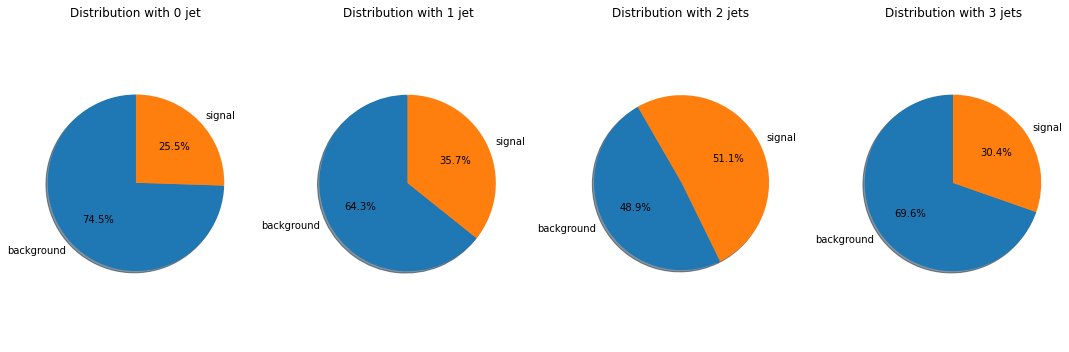

In [7]:
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))


# Pie chart
labels = 'background', 'signal'
sizes = [pct_of_minus_one_0, pct_of_one_0]

#fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Distribution with 0 jet")

sizes = [pct_of_minus_one_1, pct_of_one_1]

#fig1, ax1 = plt.subplots()
ax2.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Distribution with 1 jet")

sizes = [pct_of_minus_one_2, pct_of_one_2]

#fig1, ax1 = plt.subplots()
ax3.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=120)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.set_title("Distribution with 2 jets")

sizes = [pct_of_minus_one_3, pct_of_one_3]

#fig1, ax1 = plt.subplots()
ax4.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax4.set_title("Distribution with 3 jets")

fig1.tight_layout()

plt.show()

We can see that it makes a lot of sense to divide the data set into 4 subsets just seeing how unbalanced a subset can be depending of the jet.

In [17]:
y_0_nan = y[np.logical_and(x[:,22] == 0, x[:,0] == -999)]
pct_of_minus_one_0_nan = np.count_nonzero(y_0_nan == 0) / len(y_0_nan)
pct_of_one_0_nan = np.count_nonzero(y_0_nan == 1) / len(y_0_nan)

y_0_not_nan = y[np.logical_and(x[:,22] == 0, x[:,0] != -999)]
pct_of_minus_one_0_not_nan = np.count_nonzero(y_0_not_nan == 0) / len(y_0_not_nan)
pct_of_one_0_not_nan = np.count_nonzero(y_0_not_nan == 1) / len(y_0_not_nan)

y_1_nan = y[np.logical_and(x[:,22] == 1, x[:,0] == -999)]
pct_of_minus_one_1_nan = np.count_nonzero(y_1_nan == 0) / len(y_1_nan)
pct_of_one_1_nan = np.count_nonzero(y_1_nan == 1) / len(y_1_nan)

y_1_not_nan = y[np.logical_and(x[:,22] == 1, x[:,0] != -999)]
pct_of_minus_one_1_not_nan = np.count_nonzero(y_1_not_nan == 0) / len(y_1_not_nan)
pct_of_one_1_not_nan = np.count_nonzero(y_1_not_nan == 1) / len(y_1_not_nan)

y_2_nan = y[np.logical_and(x[:,22] == 2, x[:,0] == -999)]
pct_of_minus_one_2_nan = np.count_nonzero(y_2_nan == 0) / len(y_2_nan)
pct_of_one_2_nan = np.count_nonzero(y_2_nan == 1) / len(y_2_nan)

y_2_not_nan = y[np.logical_and(x[:,22] == 2, x[:,0] != -999)]
pct_of_minus_one_2_not_nan = np.count_nonzero(y_2_not_nan == 0) / len(y_2_not_nan)
pct_of_one_2_not_nan = np.count_nonzero(y_2_not_nan == 1) / len(y_2_not_nan)

y_3_nan = y[np.logical_and(x[:,22] == 3, x[:,0] == -999)]
pct_of_minus_one_3_nan = np.count_nonzero(y_3_nan == 0) / len(y_3_nan)
pct_of_one_3_nan = np.count_nonzero(y_3_nan == 1) / len(y_3_nan)

y_3_not_nan = y[np.logical_and(x[:,22] == 3, x[:,0] != -999)]
pct_of_minus_one_3_not_nan = np.count_nonzero(y_3_not_nan == 0) / len(y_3_not_nan)
pct_of_one_3_not_nan = np.count_nonzero(y_3_not_nan == 1) / len(y_3_not_nan)

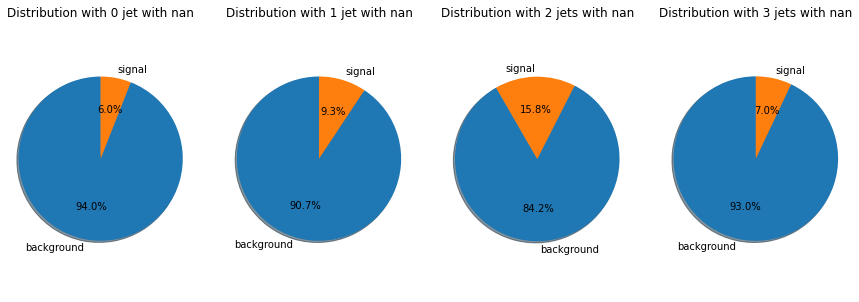

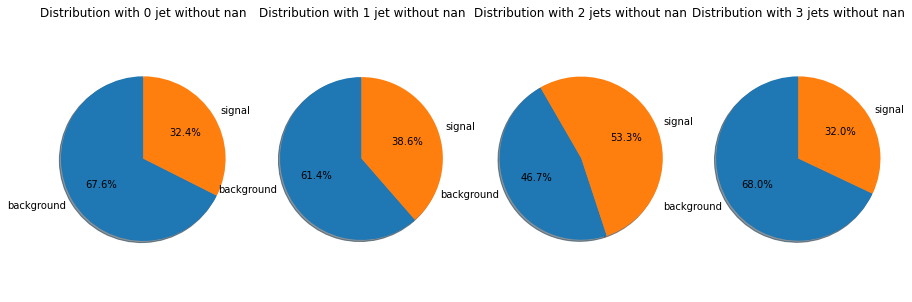

In [18]:
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))

# Pie chart
labels = 'background', 'signal'
sizes = [pct_of_minus_one_0_nan, pct_of_one_0_nan]

#fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Distribution with 0 jet with nan")

sizes = [pct_of_minus_one_1_nan, pct_of_one_1_nan]

#fig1, ax1 = plt.subplots()
ax2.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Distribution with 1 jet with nan")

sizes = [pct_of_minus_one_2_nan, pct_of_one_2_nan]

#fig1, ax1 = plt.subplots()
ax3.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=120)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.set_title("Distribution with 2 jets with nan")

sizes = [pct_of_minus_one_3_nan, pct_of_one_3_nan]

#fig1, ax1 = plt.subplots()
ax4.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax4.set_title("Distribution with 3 jets with nan")



fig1, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))


# Pie chart
labels = 'background', 'signal'
sizes = [pct_of_minus_one_0_not_nan, pct_of_one_0_not_nan]

#fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Distribution with 0 jet without nan")

sizes = [pct_of_minus_one_1_not_nan, pct_of_one_1_not_nan]

#fig1, ax1 = plt.subplots()
ax2.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Distribution with 1 jet without nan")

sizes = [pct_of_minus_one_2_not_nan, pct_of_one_2_not_nan]

#fig1, ax1 = plt.subplots()
ax3.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=120)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.set_title("Distribution with 2 jets without nan")

sizes = [pct_of_minus_one_3_not_nan, pct_of_one_3_not_nan]

#fig1, ax1 = plt.subplots()
ax4.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax4.set_title("Distribution with 3 jets without nan")

fig.tight_layout()

plt.show()

Moreover, splitting again with feature 0 we can see that again it makes sense. However, splitting like that might let us lose information on the signal because it does not appear a lot.

## Random features

With the distribution we observe that some features look like completely random. The feature 15, 18, 20, 25, 28 look very random. It might be a good idea to drop those features.

## Outsiders in distribution

Some distribution are hard to view because we have (anormally) too many values at 0 and other have values way bigger than the rest. Both cases make the distribution hard to read. We will remove the values that are outside of the first and 99 quantile. Let's plot the distribution again.

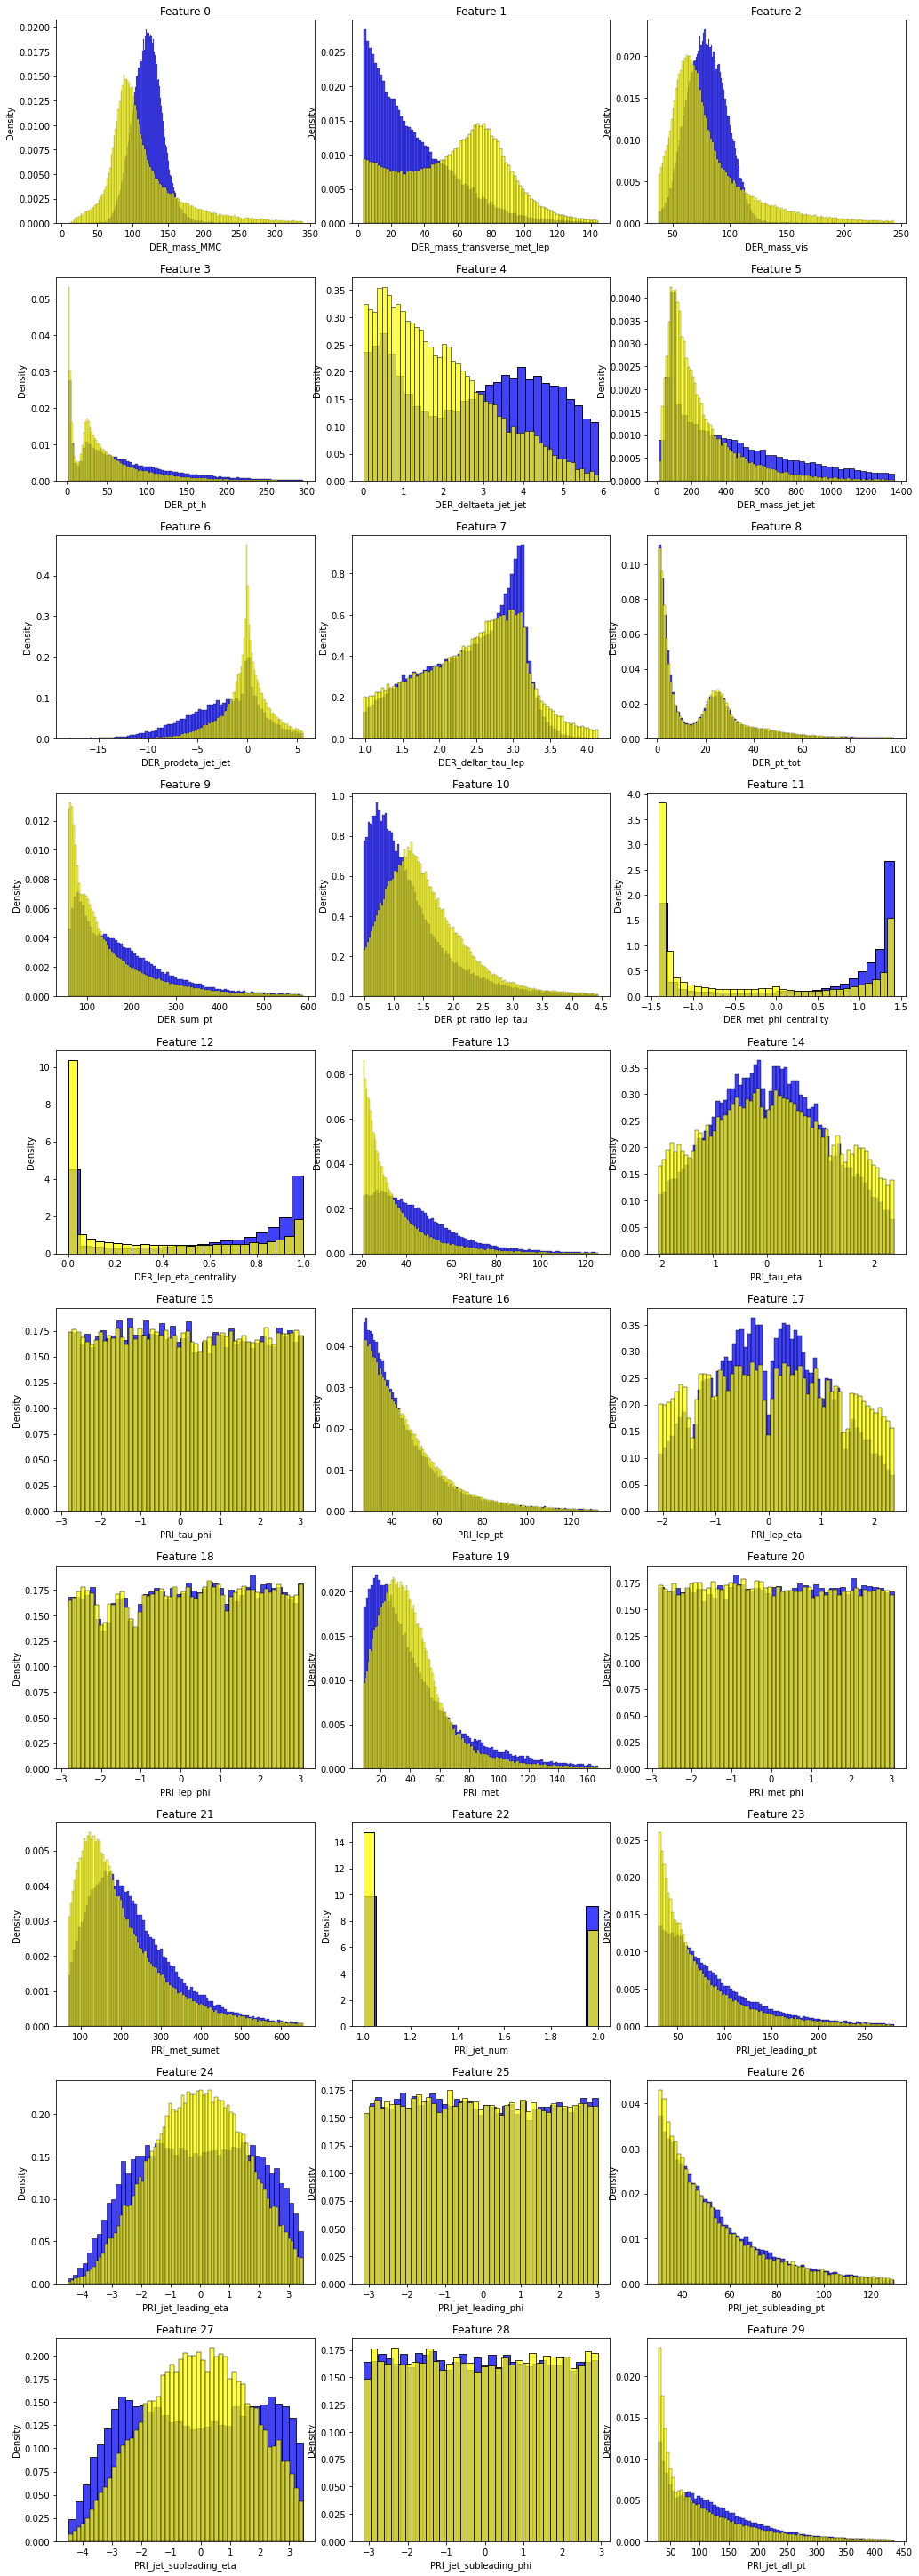

In [19]:
fig, axs = plt.subplots(10, 3, figsize=(14, 40))
axs = axs.ravel()
fig.tight_layout(h_pad=4.0)
for i, name in enumerate(features_name):

    Q5 = np.percentile(x[:, i], 5,
                   interpolation = 'midpoint')
 
    Q95 = np.percentile(x[:, i], 99, interpolation = 'midpoint')

    filter_s = np.logical_and(np.logical_and(np.logical_and(y == 1, x[:, i] != -999), x[:, i] < Q95), x[:, i] > Q5)
    filter_b = np.logical_and(np.logical_and(np.logical_and(y == 0, x[:, i] != -999), x[:, i] < Q95), x[:, i] > Q5)
                              
    s_distribution = x[:,i][filter_s]
    b_distribution = x[:,i][filter_b]

    sns.histplot(s_distribution, stat='density', color="blue", ax = axs[i])
    sns.histplot(b_distribution, stat='density', color="yellow", ax = axs[i]).set(title='Feature '+ str(i), xlabel=name)

plt.show()

In [28]:
for i, _ in enumerate(features_name):
    filter_s = np.logical_and(y == 1, x[:, i] != -999)
    filter_b = np.logical_and(y == 0, x[:, i] != -999)
    data_s = x[:, i][filter_s]
    data_b = x[:, i][filter_b]

    nb_sample = data_s.size + data_b.size
    
    Q5 = np.percentile(data_s, 5, interpolation = 'midpoint')
    Q95 = np.percentile(data_b, 95, interpolation = 'midpoint')
    
    sample_with_small = y[x[:, i] <= Q5]
    prob_small = sample_with_small.size / nb_sample
    nb_small_and_s = sample_with_small[sample_with_small == 1].size
    nb_small_and_b = sample_with_small[sample_with_small == 0].size
    prob_small_and_s = nb_small_and_s / nb_sample
    prob_small_and_b = nb_small_and_b / nb_sample

    prob_s_given_small = prob_small_and_s / prob_small
    prob_b_given_small = prob_small_and_b / prob_small
    print("Feature ",str(i)," : Given that a sample has a value smaller than Q5 as feature "+
          ", \n      the probability that it is a signal is :    ", prob_s_given_small * 100, 
          "and \n      the probability that it is not a signal is: ", prob_b_given_small * 100)
    
    sample_with_big = y[x[:, i] >= Q95]
    prob_big = sample_with_big.size / nb_sample
    nb_big_and_s = sample_with_big[sample_with_big == 1].size
    nb_big_and_b = sample_with_big[sample_with_big == 0].size
    prob_big_and_s = nb_big_and_s / nb_sample
    prob_big_and_b = nb_big_and_b / nb_sample

    prob_s_given_big = prob_big_and_s / prob_big
    prob_b_given_big = prob_big_and_b / prob_big
    
    print("   And that a sample has a value big than Q95 as feature"+
          ", \n      the probability that it is a signal is :    ", prob_s_given_big * 100, 
          "and \n      the probability that it is not a signal is: ", prob_b_given_big * 100, "\n")

Feature  0  : Given that a sample has a value smaller than Q5 as feature , 
      the probability that it is a signal is :     8.70226722869329 and 
      the probability that it is not a signal is:  91.2977327713067
   And that a sample has a value big than Q95 as feature, 
      the probability that it is a signal is :     4.724641960726414 and 
      the probability that it is not a signal is:  95.2753580392736 

Feature  1  : Given that a sample has a value smaller than Q5 as feature , 
      the probability that it is a signal is :     58.484641638225256 and 
      the probability that it is not a signal is:  41.51535836177474
   And that a sample has a value big than Q95 as feature, 
      the probability that it is a signal is :     17.29240060392552 and 
      the probability that it is not a signal is:  82.7075993960745 

Feature  2  : Given that a sample has a value smaller than Q5 as feature , 
      the probability that it is a signal is :     11.979195794418656 and 
      

   And that a sample has a value big than Q95 as feature, 
      the probability that it is a signal is :     49.32469935245143 and 
      the probability that it is not a signal is:  50.67530064754857 

Feature  20  : Given that a sample has a value smaller than Q5 as feature , 
      the probability that it is a signal is :     33.84494293585203 and 
      the probability that it is not a signal is:  66.15505706414797
   And that a sample has a value big than Q95 as feature, 
      the probability that it is a signal is :     34.07306521390802 and 
      the probability that it is not a signal is:  65.92693478609198 

Feature  21  : Given that a sample has a value smaller than Q5 as feature , 
      the probability that it is a signal is :     17.8343949044586 and 
      the probability that it is not a signal is:  82.16560509554141
   And that a sample has a value big than Q95 as feature, 
      the probability that it is a signal is :     40.87638509138006 and 
      the probabilit

We see that for some features the outliers are far from the original 65%-35%, it might a good idea to keep somehow this information if we were to remove the outliers.

### Data transformations:

Some features have a symmetric distribution with a color that has a larger tail. It might be worth the square those features in order to make them more easily linearly separbale. Features 1, 4, 6, 9, 10, 13, 14, 17, 21, 24, 27 might be worth squaring.

## Correlation between the data:

We can plot the heatmap of the correlation between the different features.

We can see that the 4th, 5th, 6th, 12th, 26th, 27th and 28th are highly correlated. We should use this information in our analysis. We could for exemple only keep one of these columns to make our model simpler. 

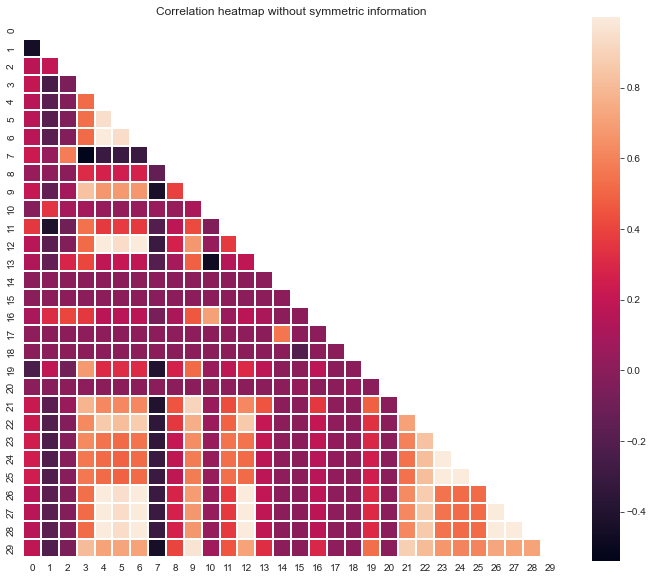

In [21]:
plt.figure(figsize = (12, 10))
corr = np.corrcoef(x.T)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    sns.heatmap(corr, mask = mask, linewidths = 0.1, square = True)
    plt.title('Correlation heatmap without symmetric information')
    plt.show()